# Logistic Regression

### Import libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

In [2]:
aviation = pd.read_csv('../Data/AviationFinal.csv')

#### Encode categorical values 

In [3]:
# Use Get dummies to encode categorical values 
weatherCondition = pd.get_dummies(aviation["WeatherCondition"], prefix_sep='_', drop_first=True)
phase = pd.get_dummies(aviation["BroadPhaseOfFlight"], prefix_sep='_', drop_first=True)
aircraftDamage = pd.get_dummies(aviation["AircraftDamage"], prefix_sep='_', drop_first=True)
investigationType = pd.get_dummies(aviation["InvestigationType"], prefix_sep='_', drop_first=True)
purposeOfFlight = pd.get_dummies(aviation["PurposeOfFlight"], prefix_sep='_', drop_first=True)
engineType = pd.get_dummies(aviation["EngineType"], prefix_sep='_', drop_first=True)

#### Combine all columns to predict aircraft damage and split into test and train

In [4]:
weatherCondition.reset_index(drop=True, inplace=True)
phase.reset_index(drop=True, inplace=True)
investigationType.reset_index(drop=True, inplace=True)
purposeOfFlight.reset_index(drop=True, inplace=True)
engineType.reset_index(drop=True, inplace=True)

train = pd.concat([weatherCondition,phase,investigationType,purposeOfFlight, engineType],axis=1)
train_y = aviation["AircraftDamage"]
X_train, X_test, y_train, y_test = train_test_split(train, train_y, test_size=0.30)

#### Fit into logistic regression model

In [5]:
logreg = LogisticRegression(solver='lbfgs', max_iter = 2828, multi_class="multinomial")
logreg.fit(X_train,y_train)

#### Print accuracy scores

In [6]:
predictions = logreg.predict(X_test)
print(classification_report(y_test,predictions))
score = logreg.score(X_test, y_test)
print(score)

              precision    recall  f1-score   support

   Destroyed       0.60      0.21      0.31      5286
       Minor       0.66      0.51      0.58       705
 Substantial       0.78      0.96      0.86     17102
     Unknown       0.52      0.35      0.42       650

    accuracy                           0.76     23743
   macro avg       0.64      0.51      0.54     23743
weighted avg       0.73      0.76      0.72     23743

0.7609400665459293


### Recursive Feature Elimination with Cross-validation
> To find out the rankings of columns and optimal number of columns. 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\c

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\c

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\c

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\c

Optimal number of features : 21


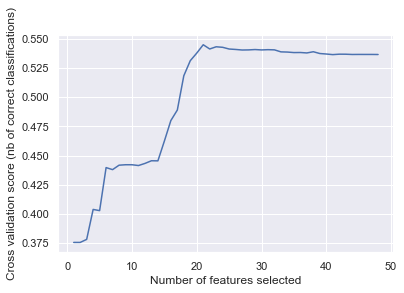

In [8]:
rfecv = RFECV(estimator=logreg, step=1, scoring='f1_macro', cv = StratifiedKFold(10))
rfecv.fit(train, train_y)
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### Drop non-important columns

In [9]:
print(np.where(rfecv.support_ == False)[0])
train.drop(train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace = True)

[ 0  2  3  5  7 10 12 14 15 17 18 19 21 22 23 25 27 28 29 35 37 38 39 40
 42 45 46]


#### Split the test and train set again, fit into logistic regression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(train, train_y, test_size=0.30)

logRegv2 = LogisticRegression(solver='lbfgs', max_iter = 2828, multi_class="multinomial")
logRegv2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2828,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Print prediction scores 

In [12]:
prediction = logRegv2.predict(X_test)
print(classification_report(y_test,prediction))

score = logRegv2.score(X_test, y_test)
print(score)

              precision    recall  f1-score   support

   Destroyed       0.61      0.25      0.35      5180
       Minor       0.65      0.45      0.53       718
 Substantial       0.79      0.95      0.86     17124
     Unknown       0.54      0.37      0.44       721

    accuracy                           0.77     23743
   macro avg       0.65      0.51      0.55     23743
weighted avg       0.74      0.77      0.73     23743

0.7666680705892263
